In [1]:
import numpy as np
class AdalineGD(object):
    def __init__(self, eta = 0.01, n_iter = 50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,size=1 + X.shape[1]) #random weights vector 
        self.cost_ = [] #we will add the cost for every epoch
        for _ in range(self.n_iter):
            net_input = self.net_input(X) #dot product between inputs and weigths
            output = self.activation(net_input) #activation function equal to net_input
            errors = (y - output) #error between true class label and continuous value
            self.w_[1:] += self.eta * X.T.dot(errors) #X.T --> (features, rows), errors --> (labels) == (new weights)
            self.w_[0] += self.eta * errors.sum() #intercept
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost) #cost for every epoch
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] #multiply weigths and sum the intercept w_0
        #X = (rows, features) x w_[1:] == (weights,1) returns a vector with predictions
    def activation(self, X):
        return X
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X))>= 0.0, 1, -1)

In [2]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/'+'ml/'+'machine-learning-databases/'+'iris/'+'iris.data'
df = pd.read_csv(s,header=None, encoding='utf-8')
#df.tail()

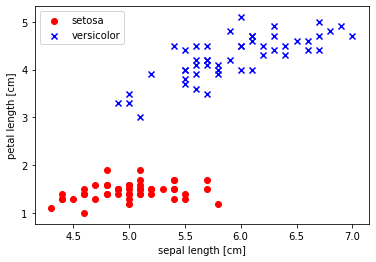

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# select setosa and versicolor
y = df.iloc[0:100, 4].values #solo utilizamos 2 de las tres clases del dataset setosa y versicolor
y = np.where(y == 'Iris-setosa', -1, 1) #setosa == -1, versicolor == 1
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values
# plot data
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

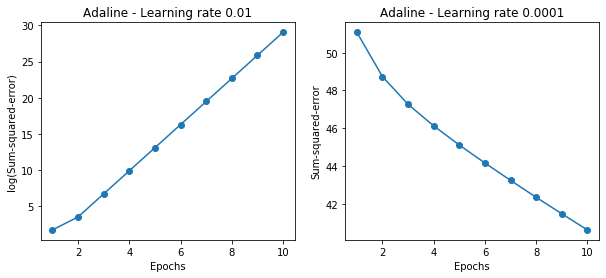

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

# Improving gradient descent

In [5]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],
                    marker=markers[idx],label=cl,edgecolor='black')

In [6]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

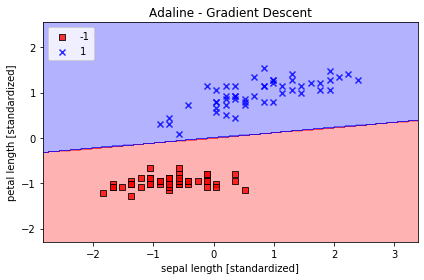

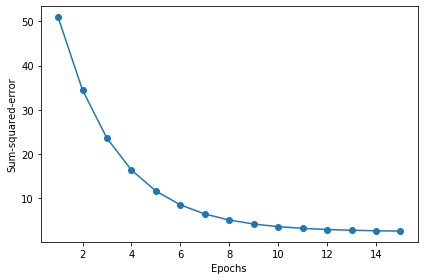

In [7]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.cost_) + 1),ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()